In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns" , 500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

In [80]:
fred_key = 'a6f8d53cd75ba1591dee2278f1367538'

# Create FRED OBJECT

In [81]:
fred = Fred(fred_key)

In [82]:
fred

# 2. Search For Economic data

In [83]:
sp_search = fred.search('S&P' , order_by='popularity')

In [84]:
sp_search.shape

(1000, 15)

In [85]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-12-18   2023-12-18   
CSUSHPINSA          CSUSHPINSA     2023-12-18   2023-12-18   
SP500                    SP500     2023-12-18   2023-12-18   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-12-18   2023-12-18   
MEHOINUSA672N    MEHOINUSA672N     2023-12-18   2023-12-18   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-12-14  Daily, Close   
CSUSHPINSA            1987-01-01      2023-09-01       Monthly   
SP500                 2013-12-16      2023-12-15  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-12-14  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
BAMLH0A0HYM2EY               D                         Percent   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-12-15 09:26:05-06:00   
CSUSHPINSA                           NSA  2023-11-28 08:12:02-06:00   
SP500                                NSA  2023-12-15 19:11:01-06:00   
BAMLH0A0HYM2EY                       NSA  2023-12-15 09:26:09-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...  
MEHOINUSA672N          82  Household data are collected as of March.  As ...

# 3. Pull Raw Data 

In [86]:
sp500 = fred.get_series(series_id='SP500')

In [87]:
sp500

2013-12-16    1786.54
2013-12-17    1781.00
2013-12-18    1810.65
2013-12-19    1809.60
2013-12-20    1818.32
               ...   
2023-12-11    4622.44
2023-12-12    4643.70
2023-12-13    4707.09
2023-12-14    4719.55
2023-12-15    4719.19
Length: 2610, dtype: float64

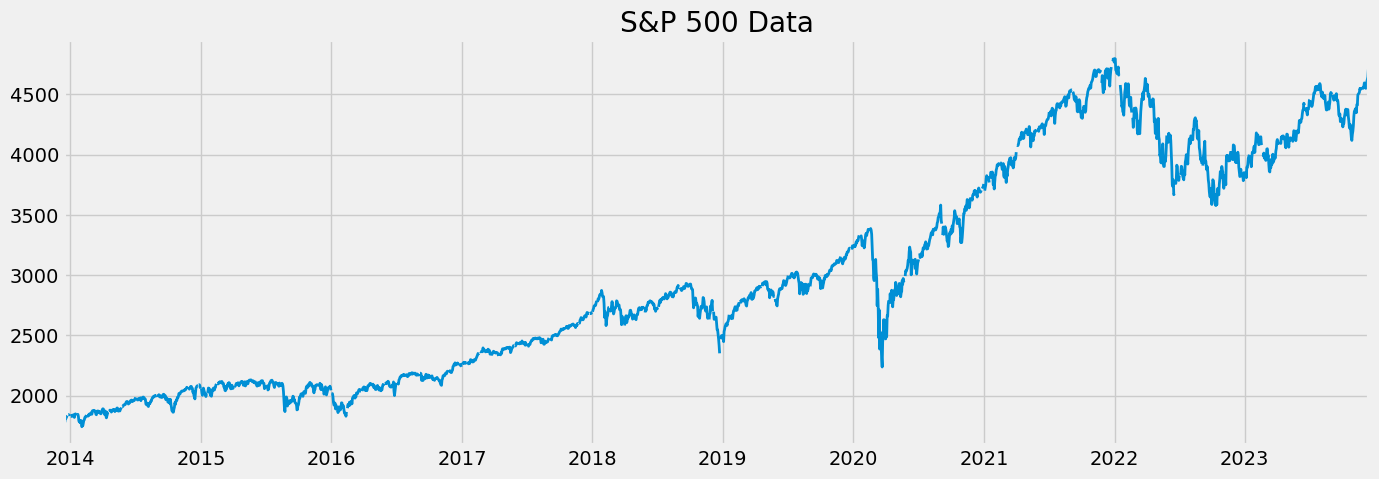

In [88]:
sp500.plot(figsize=(15 , 5), title="S&P 500 Data",lw=2)
plt.show()

# 4. Pull and Join Multiple Dta Series

In [89]:
uem_res = fred.search('unemployment')
uem_res

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2023-12-18   2023-12-18   
UNRATENSA                          UNRATENSA     2023-12-18   2023-12-18   
CCSA                                    CCSA     2023-12-18   2023-12-18   
NROU                                    NROU     2023-12-18   2023-12-18   
CCNSA                                  CCNSA     2023-12-18   2023-12-18   
...                                      ...            ...          ...   
PHIL942UR                          PHIL942UR     2023-12-18   2023-12-18   
LAUMT423798000000003A  LAUMT423798000000003A     2023-12-18   2023-12-18   
LMUNRRTTGBQ156S              LMUNRRTTGBQ156S     2023-12-18   2023-12-18   
LMUNRRTTGBA156S              LMUNRRTTGBA156S     2023-12-18   2023-12-18   
LMUNRRTTGBQ156N              LMUNRRTTGBQ156N     2023-12-18   2023-12-18   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
CCSA                             Continued Claims (Insured Unemployment)   
NROU                                    Noncyclical Rate of Unemployment   
CCNSA                            Continued Claims (Insured Unemployment)   
...                                                                  ...   
PHIL942UR              Unemployment Rate in Philadelphia-Camden-Wilmi...   
LAUMT423798000000003A  Unemployment Rate in Philadelphia-Camden-Wilmi...   
LMUNRRTTGBQ156S        Other Labor Market Measures: Registered Unempl...   
LMUNRRTTGBA156S        Other Labor Market Measures: Registered Unempl...   
LMUNRRTTGBQ156N        Other Labor Market Measures: Registered Unempl...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2023-11-01   
UNRATENSA                    1948-01-01      2023-11-01   
CCSA                         1967-01-07      2023-12-02   
NROU                         1949-01-01      2025-10-01   
CCNSA                        1967-01-07      2023-12-02   
...                                 ...             ...   
PHIL942UR                    1990-01-01      2023-10-01   
LAUMT423798000000003A        1990-01-01      2022-01-01   
LMUNRRTTGBQ156S              1960-01-01      2021-04-01   
LMUNRRTTGBA156S              1984-01-01      2022-01-01   
LMUNRRTTGBQ156N              1983-07-01      2023-07-01   

                                     frequency frequency_short    units  \
series id                                                                 
UNRATE                                 Monthly               M  Percent   
UNRATENSA                              Monthly               M  Percent   
CCSA                   Weekly, Ending Saturday               W   Number   
NROU                                 Quarterly               Q  Percent   
CCNSA                  Weekly, Ending Saturday               W   Number   
...                                        ...             ...      ...   
PHIL942UR                              Monthly               M  Percent   
LAUMT423798000000003A                   Annual               A  Percent   
LMUNRRTTGBQ156S                      Quarterly               Q  Percent   
LMUNRRTTGBA156S                         Annual               A  Percent   
LMUNRRTTGBQ156N                      Quarterly               Q  Percent   

                      units_short           seasonal_adjustment  \
series id                                                         
UNRATE                          %           Seasonally Adjusted   
UNRATENSA                       %       Not Seasonally Adjusted   
CCSA                       Number           Seasonal

<Axes: >

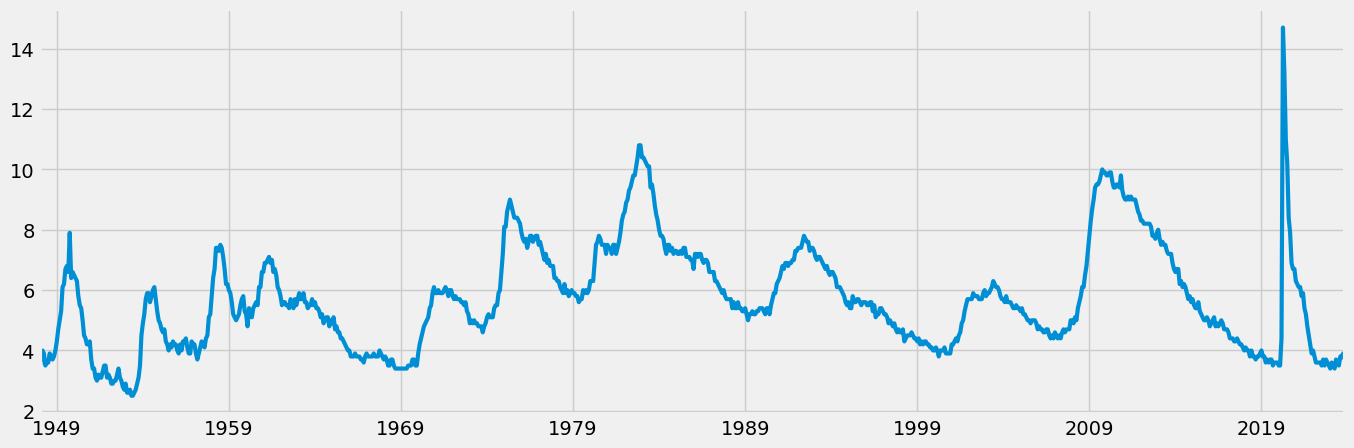

In [90]:
unrate = fred.get_series(series_id='UNRATE')
unrate.plot(figsize=(15,5), lw=3)

In [91]:
uemp_df = fred.search("unemployment rate state" , filter = ('frequency' , 'Monthly'))
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]

In [92]:
uemp_df.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [93]:
uemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'NYUR', 'LNS14000024', 'U2RATE', 'LNS14000002', 'TXUR',
       ...
       'LNS14100000', 'LRUN24TTUSM156S', 'LRUN25MAUSM156S', 'USAURAMS',
       'M08319USM156SNBR', 'LNS14000029', 'LNS14000150', 'LNS14000315',
       'LRUN25TTUSM156S', 'CMATUR'],
      dtype='object', name='series id', length=102)

In [94]:
all_results = []
for myid in uemp_df.index:
    results_df = fred.get_series(myid)
    results_df = results_df.to_frame(name=myid)
    all_results.append(results_df)

In [95]:
all_results[3]

M0892AUSM156SNBR
1929-04-01              0.69
1929-05-01              1.65
1929-06-01              2.06
1929-07-01              0.79
1929-08-01              0.04
...                      ...
1942-02-01              3.56
1942-03-01              3.22
1942-04-01              2.33
1942-05-01              1.22
1942-06-01              0.24

[159 rows x 1 columns]

In [96]:
uemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-12-18   2023-12-18   
LNS14000006            LNS14000006     2023-12-18   2023-12-18   
CAUR                          CAUR     2023-12-18   2023-12-18   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-12-18   2023-12-18   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-12-18   2023-12-18   
...                            ...            ...          ...   
LNS14000029            LNS14000029     2023-12-18   2023-12-18   
LNS14000150            LNS14000150     2023-12-18   2023-12-18   
LNS14000315            LNS14000315     2023-12-18   2023-12-18   
LRUN25TTUSM156S    LRUN25TTUSM156S     2023-12-18   2023-12-18   
CMATUR                      CMATUR     2023-12-18   2023-12-18   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000029         Unemployment Rate - 20 Yrs. & over, White Women   
LNS14000150                         Unemployment Rate - Married Men   
LNS14000315                       Unemployment Rate - Married Women   
LRUN25TTUSM156S   Unemployment Rate: Aged 25-54: All Persons for...   
CMATUR                Unemployment Rate in Middle Atlantic division   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-11-01   Monthly               M   
LNS14000006             1972-01-01      2023-11-01   Monthly               M   
CAUR                    1976-01-01      2023-10-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000029             1954-01-01      2023-11-01   Monthly               M   
LNS14000150             1955-01-01      2023-11-01   Monthly               M   
LNS14000315             1955-01-01      2023-11-01   Monthly               M   
LRUN25TTUSM156S         1960-01-01      2023-10-01   Monthly               M   
CMATUR                  1976-01-01      2023-10-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000029       Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LNS14000315       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   
CMATUR            Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-12-08 07:50:02-06:00   
LNS14000006                             SA  2023-12-08 07:50:05-06:00   
CAUR                                    SA  2023-11-20 11:19:01-06:00   
M0892AUSM156SNBR                    

In [97]:
uemp_results_all = pd.concat(all_results , axis=1)

In [98]:
uemp_results_all.isna().sum()

UNRATE               213
LNS14000006          501
CAUR                 550
M0892AUSM156SNBR     965
M0892BUSM156SNBR    1041
                    ... 
LNS14000029          285
LNS14000150          297
LNS14000315          297
LRUN25TTUSM156S      358
CMATUR               550
Length: 102, dtype: int64

<Axes: >

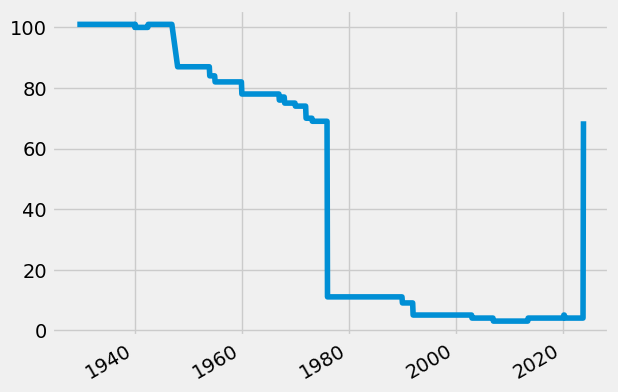

In [99]:
uemp_results_all.isna().sum(axis=1).plot()

In [104]:
uemp_states_results = uemp_results_all.drop('UNRATE',axis=1)
uemp_states_results

LNS14000006  CAUR  M0892AUSM156SNBR  M0892BUSM156SNBR  NYUR  \
1929-04-01          NaN   NaN              0.69               NaN   NaN   
1929-05-01          NaN   NaN              1.65               NaN   NaN   
1929-06-01          NaN   NaN              2.06               NaN   NaN   
1929-07-01          NaN   NaN              0.79               NaN   NaN   
1929-08-01          NaN   NaN              0.04               NaN   NaN   
...                 ...   ...               ...               ...   ...   
2023-07-01          5.8   4.6               NaN               NaN   3.9   
2023-08-01          5.3   4.6               NaN               NaN   3.9   
2023-09-01          5.7   4.7               NaN               NaN   4.0   
2023-10-01          5.8   4.8               NaN               NaN   4.2   
2023-11-01          5.8   NaN               NaN               NaN   NaN   

            LNS14000024  U2RATE  LNS14000002  TXUR  FLUR  LNS14000031  \
1929-04-01          NaN     NaN          NaN   NaN   NaN          NaN   
1929-05-01          NaN     NaN          NaN   NaN   NaN          NaN   
1929-06-01          NaN     NaN          NaN   NaN   NaN          NaN   
1929-07-01          NaN     NaN          NaN   NaN   NaN          NaN   
1929-08-01          NaN     NaN          NaN   NaN   NaN          NaN   
...                 ...     ...          ...   ...   ...          ...   
2023-07-01          3.2     1.6          3.4   4.1   2.7          5.3   
2023-08-01          3.5     1.7          3.5   4.1   2.7          5.0   
2023-09-01          3.5     1.7          3.4   4.1   2.8          5.6   
2023-10-01          3.5     1.8          3.6   4.1   2.8          5.3   
2023-11-01          3.4     1.8          3.4   NaN   NaN          6.4   

            LNS14000009  LNS14000003  ILUR  LNS14027660  MIUR  LNS14027662  \
1929-04-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-05-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-06-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-07-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-08-01          NaN          NaN   NaN          NaN   NaN          NaN   
...                 ...          ...   ...          ...   ...          ...   
2023-07-01          4.4          3.1   4.0          3.4   3.6          2.0   
2023-08-01          4.9          3.4   4.1          3.8   3.7          2.2   
2023-09-01          4.6          3.4   4.4          4.1   3.9          2.1   
2023-10-01          4.8          3.5   4.6          4.0   4.1          2.1   
2023-11-01          4.6          3.3   NaN          4.1   NaN          2.1   

            LRUN64TTUSM156S  LNS14024887  LNS14000001  OHUR  MAUR  NJUR  ALUR  \
1929-04-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
...                     ...          ...          ...   ...   ...   ...   ...   
2023-07-01         3.637014          8.0          3.6   3.3   2.5   3.9   2.1   
2023-08-01         3.803906          8.6          4.0   3.4   2.6   4.2   2.1   
2023-09-01         3.851825          8.4          4.1   3.4   2.6   4.4   2.2   
2023-10-01         3.913264          8.9          4.1   3.6   2.8   4.6   2.3   
2023-11-01              NaN          8.1          4.0   NaN   NaN   NaN   NaN   

            AZUR  PAUR  GAUR  MNUR  KYUR  NCUR  WIUR  VAUR  WAUR  SCUR  COUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929

In [113]:
uemp_states_results = uemp_results_all
uemp_states_results

UNRATE  LNS14000006  CAUR  M0892AUSM156SNBR  M0892BUSM156SNBR  \
1929-04-01     NaN          NaN   NaN              0.69               NaN   
1929-05-01     NaN          NaN   NaN              1.65               NaN   
1929-06-01     NaN          NaN   NaN              2.06               NaN   
1929-07-01     NaN          NaN   NaN              0.79               NaN   
1929-08-01     NaN          NaN   NaN              0.04               NaN   
...            ...          ...   ...               ...               ...   
2023-07-01     3.5          5.8   4.6               NaN               NaN   
2023-08-01     3.8          5.3   4.6               NaN               NaN   
2023-09-01     3.8          5.7   4.7               NaN               NaN   
2023-10-01     3.9          5.8   4.8               NaN               NaN   
2023-11-01     3.7          5.8   NaN               NaN               NaN   

            NYUR  LNS14000024  U2RATE  LNS14000002  TXUR  FLUR  LNS14000031  \
1929-04-01   NaN          NaN     NaN          NaN   NaN   NaN          NaN   
1929-05-01   NaN          NaN     NaN          NaN   NaN   NaN          NaN   
1929-06-01   NaN          NaN     NaN          NaN   NaN   NaN          NaN   
1929-07-01   NaN          NaN     NaN          NaN   NaN   NaN          NaN   
1929-08-01   NaN          NaN     NaN          NaN   NaN   NaN          NaN   
...          ...          ...     ...          ...   ...   ...          ...   
2023-07-01   3.9          3.2     1.6          3.4   4.1   2.7          5.3   
2023-08-01   3.9          3.5     1.7          3.5   4.1   2.7          5.0   
2023-09-01   4.0          3.5     1.7          3.4   4.1   2.8          5.6   
2023-10-01   4.2          3.5     1.8          3.6   4.1   2.8          5.3   
2023-11-01   NaN          3.4     1.8          3.4   NaN   NaN          6.4   

            LNS14000009  LNS14000003  ILUR  LNS14027660  MIUR  LNS14027662  \
1929-04-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-05-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-06-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-07-01          NaN          NaN   NaN          NaN   NaN          NaN   
1929-08-01          NaN          NaN   NaN          NaN   NaN          NaN   
...                 ...          ...   ...          ...   ...          ...   
2023-07-01          4.4          3.1   4.0          3.4   3.6          2.0   
2023-08-01          4.9          3.4   4.1          3.8   3.7          2.2   
2023-09-01          4.6          3.4   4.4          4.1   3.9          2.1   
2023-10-01          4.8          3.5   4.6          4.0   4.1          2.1   
2023-11-01          4.6          3.3   NaN          4.1   NaN          2.1   

            LRUN64TTUSM156S  LNS14024887  LNS14000001  OHUR  MAUR  NJUR  ALUR  \
1929-04-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01              NaN          NaN          NaN   NaN   NaN   NaN   NaN   
...                     ...          ...          ...   ...   ...   ...   ...   
2023-07-01         3.637014          8.0          3.6   3.3   2.5   3.9   2.1   
2023-08-01         3.803906          8.6          4.0   3.4   2.6   4.2   2.1   
2023-09-01         3.851825          8.4          4.1   3.4   2.6   4.4   2.2   
2023-10-01         3.913264          8.9          4.1   3.6   2.8   4.6   2.3   
2023-11-01              NaN          8.1          4.0   NaN   NaN   NaN   NaN   

            AZUR  PAUR  GAUR  MNUR  KYUR  NCUR  WIUR  VAUR  WAUR  SCUR  COUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   N

In [114]:
px.line(uemp_states_results)

c:\Users\lenvo\anaconda3\Lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\lenvo\anaconda3\Lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

c:\Users\lenvo\anaconda3\Lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

## Pull data for a specific date

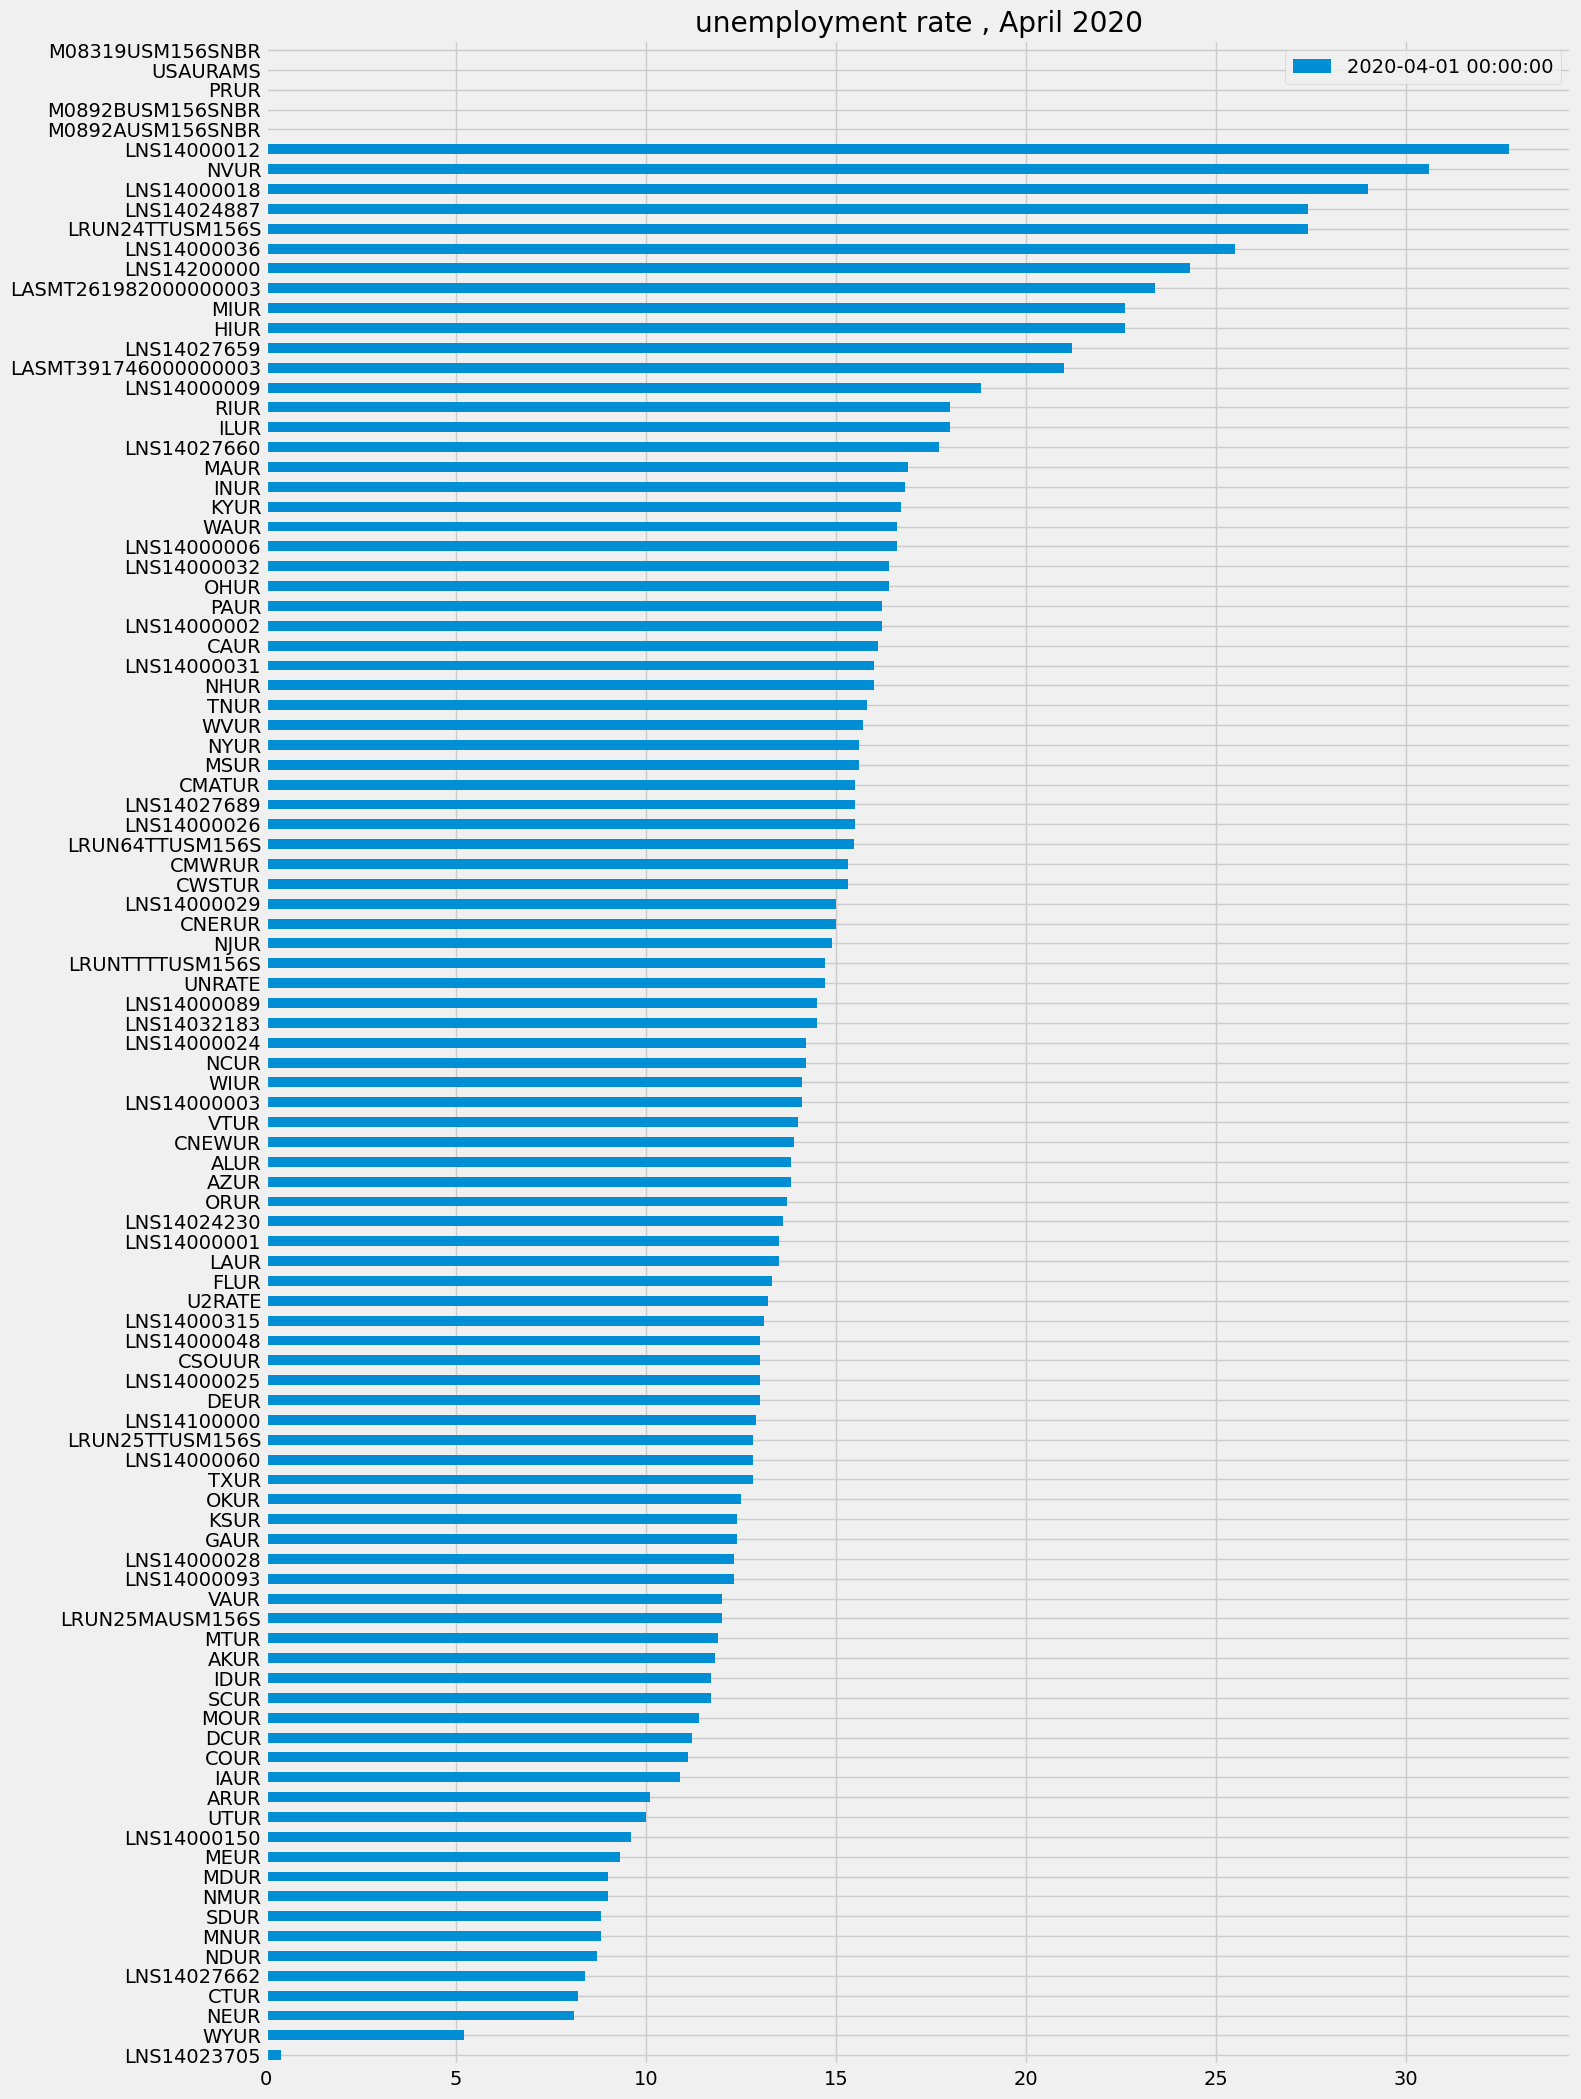

In [129]:
ax = uemp_states_results.loc[uemp_results_all.index == '2020-04-01'] \
    .T.sort_values('2020-04-01') \
    .plot(kind='barh' , figsize=(15,25) , title='unemployment rate , April 2020')
plt.show()

In [126]:

uemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-12-18   2023-12-18   
LNS14000006            LNS14000006     2023-12-18   2023-12-18   
CAUR                          CAUR     2023-12-18   2023-12-18   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-12-18   2023-12-18   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-12-18   2023-12-18   
...                            ...            ...          ...   
LNS14000029            LNS14000029     2023-12-18   2023-12-18   
LNS14000150            LNS14000150     2023-12-18   2023-12-18   
LNS14000315            LNS14000315     2023-12-18   2023-12-18   
LRUN25TTUSM156S    LRUN25TTUSM156S     2023-12-18   2023-12-18   
CMATUR                      CMATUR     2023-12-18   2023-12-18   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000029         Unemployment Rate - 20 Yrs. & over, White Women   
LNS14000150                         Unemployment Rate - Married Men   
LNS14000315                       Unemployment Rate - Married Women   
LRUN25TTUSM156S   Unemployment Rate: Aged 25-54: All Persons for...   
CMATUR                Unemployment Rate in Middle Atlantic division   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-11-01   Monthly               M   
LNS14000006             1972-01-01      2023-11-01   Monthly               M   
CAUR                    1976-01-01      2023-10-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000029             1954-01-01      2023-11-01   Monthly               M   
LNS14000150             1955-01-01      2023-11-01   Monthly               M   
LNS14000315             1955-01-01      2023-11-01   Monthly               M   
LRUN25TTUSM156S         1960-01-01      2023-10-01   Monthly               M   
CMATUR                  1976-01-01      2023-10-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000029       Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LNS14000315       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   
CMATUR            Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-12-08 07:50:02-06:00   
LNS14000006                             SA  2023-12-08 07:50:05-06:00   
CAUR                                    SA  2023-11-20 11:19:01-06:00   
M0892AUSM156SNBR                    

# Pull Participitation rate

In [157]:
part_df = fred.search('Labor Force Participation Rate - state' , filter=(('frequency',"Monthly")))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2023-12-18   2023-12-18   
LNS11300060          LNS11300060     2023-12-18   2023-12-18   
LNS11300002          LNS11300002     2023-12-18   2023-12-18   
LNS11300001          LNS11300001     2023-12-18   2023-12-18   
LNS11324230          LNS11324230     2023-12-18   2023-12-18   
...                          ...            ...          ...   
LRIN74FEUSM156S  LRIN74FEUSM156S     2023-12-18   2023-12-18   
LRIN74MAUSM156S  LRIN74MAUSM156S     2023-12-18   2023-12-18   
LRIN25TTUSM156S  LRIN25TTUSM156S     2023-12-18   2023-12-18   
LRIN74TTUSM156S  LRIN74TTUSM156S     2023-12-18   2023-12-18   
LRIN25FEUSM156S  LRIN25FEUSM156S     2023-12-18   2023-12-18   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74FEUSM156S  Inactivity Rate: Aged 15-74: Females for Unite...   
LRIN74MAUSM156S  Inactivity Rate: Aged 15-74: Males for United ...   
LRIN25TTUSM156S  Inactivity Rate: Aged 25-54: All Persons for U...   
LRIN74TTUSM156S  Inactivity Rate: Aged 15-74: All Persons for U...   
LRIN25FEUSM156S  Inactivity Rate: Aged 25-54: Females for Unite...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2023-11-01   Monthly               M   
LNS11300060            1948-01-01      2023-11-01   Monthly               M   
LNS11300002            1948-01-01      2023-11-01   Monthly               M   
LNS11300001            1948-01-01      2023-11-01   Monthly               M   
LNS11324230            1948-01-01      2023-11-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74FEUSM156S        1981-01-01      2023-10-01   Monthly               M   
LRIN74MAUSM156S        1981-01-01      2023-10-01   Monthly               M   
LRIN25TTUSM156S        1977-01-01      2023-10-01   Monthly               M   
LRIN74TTUSM156S        1981-01-01      2023-10-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2023-10-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN25TTUSM156S  Percent           %  Seasonally Adjusted   
LRIN74TTUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2023-12-08 07:50:02-06:00   
LNS11300060                            SA 2023-12-08 07:50:10-06:00   
LNS11300002                            SA 2023-12-08 07:50:10-06:00   
LNS11300001                            SA 2023-12-08 07:50:12-06:00   
LNS11324230                           

In [159]:
part_df['title'].sum()


"Labor Force Participation RateLabor Force Participation Rate - 25-54 Yrs.Labor Force Participation Rate - WomenLabor Force Participation Rate - MenLabor Force Participation Rate - 55 Yrs. & overLabor Force Participation Rate - 16-19 Yrs.Labor Force Participation Rate - Black or African AmericanActivity Rate: Aged 25-54: Females for United StatesActivity Rate: Aged 25-54: Males for United StatesLabor Force Participation Rate - 20-24 Yrs.Labor Force Participation Rate for CaliforniaLabor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & overLabor Force Participation Rate for AlabamaLabor Force Participation Rate for FloridaLabor Force Participation Rate for New YorkLabor Force Participation Rate - Hispanic or LatinoLabor Force Participation Rate for MichiganLabor Force Participation Rate - 20 Yrs. & over, WomenLabor Force Participation Rate for WisconsinLabor Force Participation Rate - 20 Yrs. & over, Black or African American MenLabor Force Participation Rate for Kentu